In [2]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import MinMaxScaler
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv('timeseries.csv')


In [4]:
df = df.dropna(subset=['time']) 
df['time'].tail(20)
# df['time'][78886]

96418                                        20201231:1007
96419                                        20201231:1107
96420                                        20201231:1207
96421                                        20201231:1307
96422                                        20201231:1407
96423                                        20201231:1507
96424                                        20201231:1607
96425                                        20201231:1707
96426                                        20201231:1807
96427                                        20201231:1907
96428                                        20201231:2007
96429                                        20201231:2107
96430                                        20201231:2207
96431                                        20201231:2307
96433    G(i): Global irradiance on the inclined plane ...
96434                           H_sun: Sun height (degree)
96435            T2m: 2-m air temperature (degree Celsiu

In [28]:
df = df[:96431:]
df_multi = df.iloc[:,1:5] # removing the time column 
df.tail(30)
print(df_multi.tail(10))
print(df_multi.dtypes)
# y = [x for x in df['Int'] if x == 0.0]
# print(y)b
# type(df_multi)


         G(i)  H_sun    T2m  WS10m
96421  486.98   24.3  28.01   3.72
96422  221.49   11.9  26.94   3.59
96423       0    0.0  24.97   2.55
96424       0    0.0  23.19   1.86
96425       0    0.0  20.98   1.45
96426       0    0.0  19.31   1.38
96427       0    0.0  17.90   1.45
96428       0    0.0  16.52   1.52
96429       0    0.0  15.39   1.59
96430       0    0.0  14.28   1.59
G(i)      object
H_sun    float64
T2m      float64
WS10m    float64
dtype: object


In [29]:
df_multi['G(i)'] = pd.to_numeric(df_multi['G(i)'], errors='coerce')
unique_types = df_multi['G(i)'].apply(type).unique()

print(unique_types)

[<class 'float'>]


In [30]:
# Initialize the Min-Max Scaler

scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the data
scaled_data = scaler.fit_transform(df_multi)
print(scaled_data.shape)
print(scaled_data[1:10,:])

(96431, 4)
[[0.         0.         0.15526224 0.26194399]
 [0.         0.         0.13581105 0.29489292]
 [0.         0.         0.12782216 0.30642504]
 [0.07973716 0.03197405 0.12400139 0.31795717]
 [0.3747421  0.18153383 0.18339701 0.28336079]
 [0.59065139 0.32228916 0.32025009 0.28336079]
 [0.75219758 0.44775255 0.44911428 0.28336079]
 [0.8561645  0.54622335 0.51684613 0.27347611]
 [0.89670059 0.59905005 0.55331712 0.20428336]]


In [31]:
df_orignal_scaled = scaled_data
df_orignal = df_multi
df_scaled = scaled_data[:78888:]

In [32]:

print(df_scaled[0:5,:]) # this it the input
print(df_scaled[5,:]) # this is the output

[[0.         0.         0.17262939 0.26194399]
 [0.         0.         0.15526224 0.26194399]
 [0.         0.         0.13581105 0.29489292]
 [0.         0.         0.12782216 0.30642504]
 [0.07973716 0.03197405 0.12400139 0.31795717]]
[0.3747421  0.18153383 0.18339701 0.28336079]


In [58]:
def create_sequences(input_data, target_data, sequence_length):
    sequences = []
    target = []
    for i in range(sequence_length, len(input_data)):
        sequences.append(input_data[i-sequence_length:i])  # includes all features, including past G(i)
        target.append(target_data[i])  # the value of G(i) to predict
    return np.array(sequences), np.array(target)

# Select the features including past values of G(i)
features = df.values  # assuming df is ordered with 'time' removed and 'G(i)' as the first column

# Create sequences including past G(i) values in the features
X, y = create_sequences(features, features[:, 0], sequence_length)


NameError: name 'sequence_length' is not defined

In [43]:
print(X.shape),print(y.shape)

(78864, 24, 3)
(78864,)


(None, None)

In [44]:
X[1]

array([[0.        , 0.        , 0.15526224],
       [0.        , 0.        , 0.13581105],
       [0.        , 0.        , 0.12782216],
       [0.07973716, 0.03197405, 0.12400139],
       [0.3747421 , 0.18153383, 0.18339701],
       [0.59065139, 0.32228916, 0.32025009],
       [0.75219758, 0.44775255, 0.44911428],
       [0.8561645 , 0.54622335, 0.51684613],
       [0.89670059, 0.59905005, 0.55331712],
       [0.86597777, 0.58978221, 0.59569295],
       [0.76901538, 0.52201112, 0.61653352],
       [0.60908161, 0.41415663, 0.62348038],
       [0.409548  , 0.28348007, 0.61340743],
       [0.1811554 , 0.1397127 , 0.58978812],
       [0.        , 0.        , 0.53560264],
       [0.        , 0.        , 0.4720389 ],
       [0.        , 0.        , 0.42028482],
       [0.        , 0.        , 0.36401528],
       [0.        , 0.        , 0.30323029],
       [0.        , 0.        , 0.26085446],
       [0.        , 0.        , 0.2205627 ],
       [0.        , 0.        , 0.19694338],
       [0.

In [11]:
X_train1, y_train1 = X1[:61367], y1[:61367]
X_val1, y_val1 = X1[61367:70127], y1[61367:70127] # 1 year for validation [61,367 , 70127]
X_test1, y_test1 = X1[70128:], y1[70128:] #  1 year testing [70,128 , 78887]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape


((61367, 10, 3),
 (61367, 3),
 (8760, 10, 3),
 (8760, 3),
 (8750, 10, 3),
 (8750, 3))

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((10, 3)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(3, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                17408     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 3)                 27        
                                                                 
Total params: 17,955
Trainable params: 17,955
Non-trainable params: 0
_________________________________________________________________


In [13]:
from tensorflow.keras.callbacks import EarlyStopping

In [14]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=6, verbose=1, mode='min')

In [15]:
cp1 = ModelCheckpoint('model_correlation_24/', save_best_only=True)
# metrics , learning rate, loss  can be changed 
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [16]:
history=model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=100, callbacks=[cp1,early_stopping])

Epoch 1/100
1916/1918 [============================>.] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.0728

INFO:tensorflow:Assets written to: model_correlation_24\assets


INFO:tensorflow:Assets written to: model_correlation_24\assets


1918/1918 [==============================] - 22s 10ms/step - loss: 0.0053 - root_mean_squared_error: 0.0727 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0515
Epoch 2/100
1914/1918 [============================>.] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.0443

INFO:tensorflow:Assets written to: model_correlation_24\assets


INFO:tensorflow:Assets written to: model_correlation_24\assets


1918/1918 [==============================] - 19s 10ms/step - loss: 0.0020 - root_mean_squared_error: 0.0443 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0468
Epoch 3/100
1913/1918 [============================>.] - ETA: 0s - loss: 0.0018 - root_mean_squared_error: 0.0420

INFO:tensorflow:Assets written to: model_correlation_24\assets


INFO:tensorflow:Assets written to: model_correlation_24\assets


1918/1918 [==============================] - 20s 10ms/step - loss: 0.0018 - root_mean_squared_error: 0.0420 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0448
Epoch 4/100
1910/1918 [============================>.] - ETA: 0s - loss: 0.0016 - root_mean_squared_error: 0.0404

INFO:tensorflow:Assets written to: model_correlation_24\assets


INFO:tensorflow:Assets written to: model_correlation_24\assets


1918/1918 [==============================] - 20s 10ms/step - loss: 0.0016 - root_mean_squared_error: 0.0404 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0440
Epoch 5/100
1918/1918 [==============================] - ETA: 0s - loss: 0.0015 - root_mean_squared_error: 0.0391

INFO:tensorflow:Assets written to: model_correlation_24\assets


INFO:tensorflow:Assets written to: model_correlation_24\assets


1918/1918 [==============================] - 21s 11ms/step - loss: 0.0015 - root_mean_squared_error: 0.0391 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0411
Epoch 6/100
1914/1918 [============================>.] - ETA: 0s - loss: 0.0015 - root_mean_squared_error: 0.0382

INFO:tensorflow:Assets written to: model_correlation_24\assets


INFO:tensorflow:Assets written to: model_correlation_24\assets


1918/1918 [==============================] - 21s 11ms/step - loss: 0.0015 - root_mean_squared_error: 0.0382 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0409
Epoch 7/100
1913/1918 [============================>.] - ETA: 0s - loss: 0.0014 - root_mean_squared_error: 0.0372

INFO:tensorflow:Assets written to: model_correlation_24\assets


INFO:tensorflow:Assets written to: model_correlation_24\assets


1918/1918 [==============================] - 21s 11ms/step - loss: 0.0014 - root_mean_squared_error: 0.0372 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0392
Epoch 7: early stopping


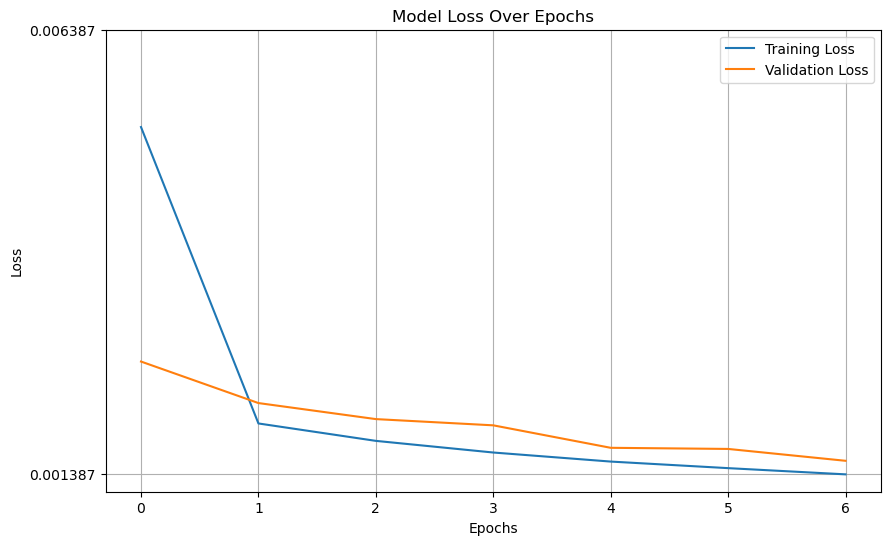

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)



min_loss = min(min(history.history['loss']), min(history.history['val_loss']))
max_loss = max(max(history.history['loss']), max(history.history['val_loss']))
interval = 0.005  # Adjust the interval based on your specific needs
ticks = np.arange(min_loss, max_loss + interval, interval)
plt.yticks(ticks)



plt.show()


In [19]:
from tensorflow.keras.models import load_model
model1 = load_model('model_correlation_24/')

In [46]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1.flatten()})
train_results.head(20)

1918/1918 [==============================] - 5s 2ms/step


,Train Predictions,Actuals
0,0.612010,0.589782
1,0.596225,0.595693
2,0.220283,0.125206
3,0.525248,0.522011
4,0.625617,0.616534
5,0.157098,0.046129
6,0.414060,0.414157
7,0.637401,0.623480
8,0.087863,0.034596
9,0.280246,0.283480


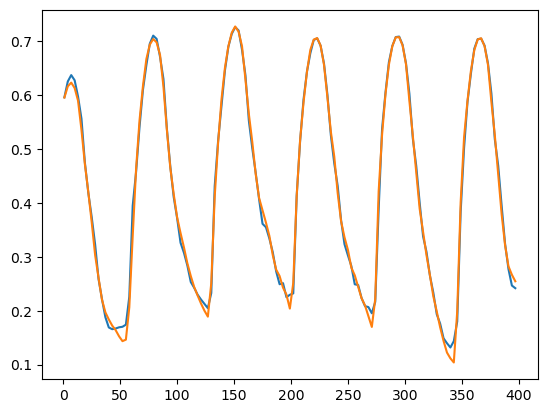

In [47]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][1:400:3])
plt.plot(train_results['Actuals'][1:400:3])

In [50]:

val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1.flatten()})
val_results

274/274 [==============================] - 1s 2ms/step


,Val Predictions,Actuals
0,0.563886,0.599050
1,0.642739,0.641890
2,0.817178,0.772652
3,0.568061,0.589782
4,0.692739,0.689823
...,...,...
26275,0.513716,0.528656
26276,0.128090,0.090610
26277,0.553215,0.546223
26278,0.584741,0.595346


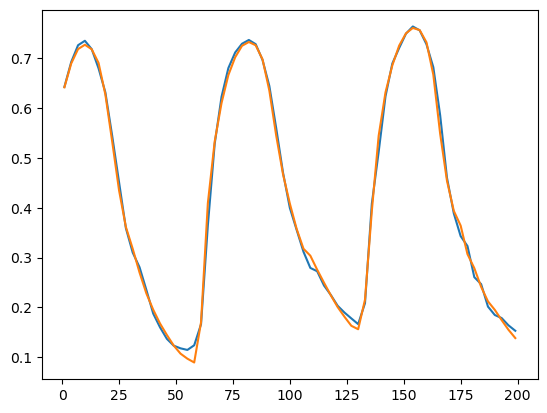

In [51]:
plt.plot(val_results['Val Predictions'][1:200:3])
plt.plot(val_results['Actuals'][1:200:3])

In [52]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1.flatten()})
test_results

274/274 [==============================] - 1s 2ms/step


,Test Predictions,Actuals
0,0.611486,0.589782
1,0.686485,0.687391
2,0.340772,0.341021
3,0.521764,0.522011
4,0.705744,0.709969
...,...,...
26245,0.309191,0.308093
26246,0.363710,0.375618
26247,-0.007617,0.000000
26248,0.272373,0.278569


In [53]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=1, end=400):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions': predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end:3])
  plt.plot(df['Actuals'][start:end:3])
  return df, mse(predictions, y)

274/274 [==============================] - 1s 2ms/step


(       Predictions   Actuals
 0         0.611486  0.589782
 1         0.686485  0.687391
 2         0.340772  0.341021
 3         0.521764  0.522011
 4         0.705744  0.709969
 ...            ...       ...
 26245     0.309191  0.308093
 26246     0.363710  0.375618
 26247    -0.007617  0.000000
 26248     0.272373  0.278569
 26249     0.373872  0.385502
 
 [26250 rows x 2 columns],
 0.0011335152740720557)

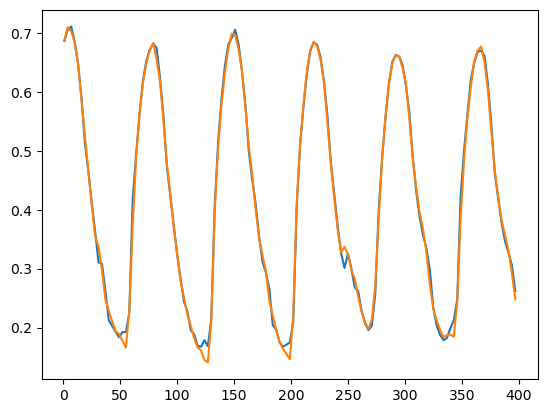

In [54]:
plot_predictions1(model1, X_test1, y_test1.flatten())

In [56]:
kkk = df_orignal_scaled[78883:78893,:]
print(type(kkk))
print(kkk.shape)
reshaped_array = np.reshape(kkk, (1, 10, 3))
print(reshaped_array)
predictions = model1.predict(reshaped_array)
print(predictions)
 
original= scaler.inverse_transform(predictions)
print(original)
# predictions
# inverse_data = np.zeros((len(predictions), scaler.shape[1]))

<class 'numpy.ndarray'>
(11, 4)


ValueError: cannot reshape array of size 44 into shape (1,10,3)

In [57]:

input = df_orignal_scaled[78883:78893,:]  # Initial input extracted from your original scaled DataFrame
output_scaled = []  
output_not_scaled = [] 

for i in range(24):
    # Reshape input for the model prediction
    reshaped_array = np.reshape(input, (1, 10, 3))
    scaled_prediction = model1.predict(reshaped_array)
    
    # Reshape the prediction to match the input shape if necessary
    # This example assumes the model returns a prediction with shape (1, 4)
    # Adjust the reshaping based on the actual shape of your model's output
    scaled_prediction_reshaped = np.reshape(scaled_prediction, (1, 3))
    input = np.reshape(input, (10, 3))  # Ensure input is in the correct shape before appending
    # Append the new prediction at the end of the input array
    input = np.vstack([input, scaled_prediction_reshaped])  # Stack vertically to add as a new row
    
    # Remove the oldest entry to maintain the sliding window of input data
    input = input[1:, :]  # Keep the last 5 entries, including the newly added prediction
 
    output_scaled.append(scaled_prediction)


# print(output_scaled)  # Remains empty, uncomment if needed
print(output_scaled)  # Print or process the predictions as 




ValueError: cannot reshape array of size 40 into shape (1,10,3)

In [ ]:
print("this is the real scaled output")
for i in output_scaled:
    original= scaler.inverse_transform(i)
    print(original)